# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Read in Dataset

In [2]:
# Load the dataset
file_path = '/Users/deadrienhill/codeup-data-science/oneil-clustering-exercises/D212_Churn_Clean.csv'  
df = pd.read_csv(file_path)
# Display first few rows
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


# PCA Data Prep

In [3]:
# Identify continuous variables
continuous_variables = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','Outage_sec_perweek']

In [4]:
# Filter the dataset for the continuous variables
continuous_data = df[continuous_variables]

In [5]:
# Standardize the continuous dataset variables
scaler = StandardScaler()
standardized_df = scaler.fit_transform(continuous_data)

In [6]:
# Save the cleaned and standardized dataset
cleaned_df_path = "cleaned_standardized_df.csv"
cleaned_df = pd.DataFrame(standardized_df, columns=continuous_variables)
cleaned_df.to_csv(cleaned_df_path, index=False)

# PCA

In [7]:
# Perform PCA 
pca = PCA()
pca_result = pca.fit_transform(standardized_df)

In [8]:
# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

In [9]:
# Create a DataFrame for the PCA loadings (components)
pca_components = pd.DataFrame(
    pca.components_, 
    columns=continuous_data.columns,  
    index=[f"PC{i+1}" for i in range(len(pca.components_))]
)

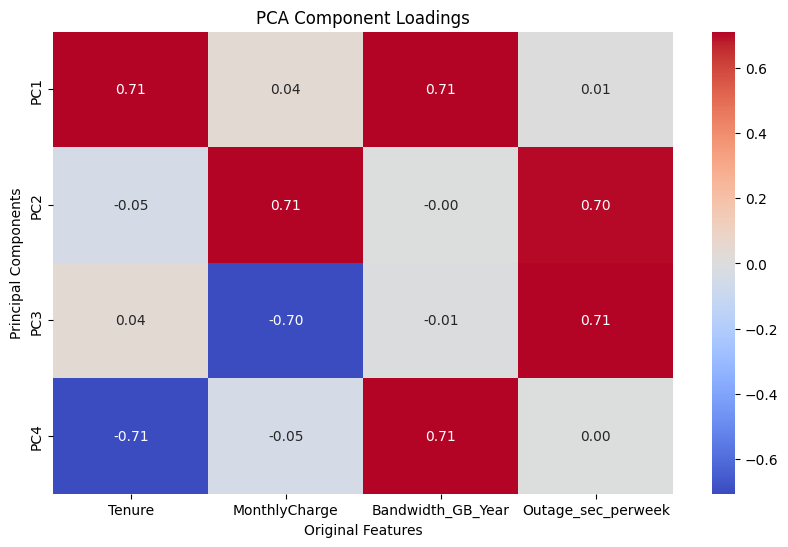

In [10]:
# Visualize the PCA loadings as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("PCA Component Loadings")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

In [18]:
# Save the matrix of all principal components
pca_matrix = "pca_matrix.csv"
pca_components.to_csv(pca_matrix, index=False)
print(pca_components)

       Tenure  MonthlyCharge  Bandwidth_GB_Year  Outage_sec_perweek
PC1  0.705850       0.040761           0.707163            0.005898
PC2 -0.046197       0.709435          -0.000646            0.703255
PC3  0.039890      -0.702127          -0.005274            0.710914
PC4 -0.705727      -0.045358           0.707031            0.000047


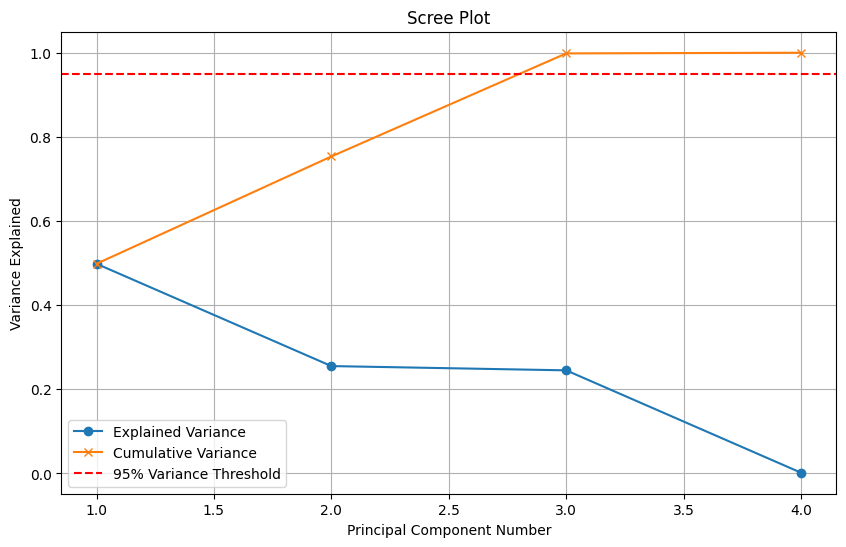

In [12]:
# Identify the total number of principal components using the scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Determine the number of components needed to reach 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

In [14]:
# Identify the variance of each of the principal components
variances = explained_variance_ratio[:num_components_95]

In [15]:
# Identify the total variance captured
total_variance_captured = cumulative_variance[num_components_95 - 1]

In [16]:
# Summarize the results
summary = {
    "Total Principal Components": [pca_result.shape[1]],
    "Principal Components for 95% Variance": [num_components_95],
    "Variance of Each Principal Component": [list(variances)],
    "Total Variance Captured by Top Components": [total_variance_captured]
}

summary_df = pd.DataFrame(summary)

In [17]:
# Save the summary results
summary_path = "pca_summary.csv"
summary_df.to_csv(summary_path, index=False)

print("PCA Analysis Summary:")
print(summary_df)
print(f"Summary saved to: {summary_path}")

PCA Analysis Summary:
   Total Principal Components  Principal Components for 95% Variance  \
0                           4                                      3   

                Variance of Each Principal Component  \
0  [0.49829278647258063, 0.25511994209389716, 0.2...   

   Total Variance Captured by Top Components  
0                                   0.998385  
Summary saved to: pca_summary.csv
